<a href="https://colab.research.google.com/github/MacWorldPro/Module_34/blob/main/Time_series_Analysis_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=sns.load_dataset('flights')

In [3]:
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
pip install seaborn statsmodels


In [8]:
# Map month names to numeric values
month_map = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

# Apply the mapping to the month column
df['month'] = df['month'].map(month_map)

# Convert the 'year' and 'month' columns to a datetime format and set it as the index
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))
df.set_index('date', inplace=True)

# Drop the 'year' and 'month' columns as they are no longer needed
df.drop(columns=['year', 'month'], inplace=True)

# Display the first few rows to verify the changes
print(df.head())


            passengers
date                  
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


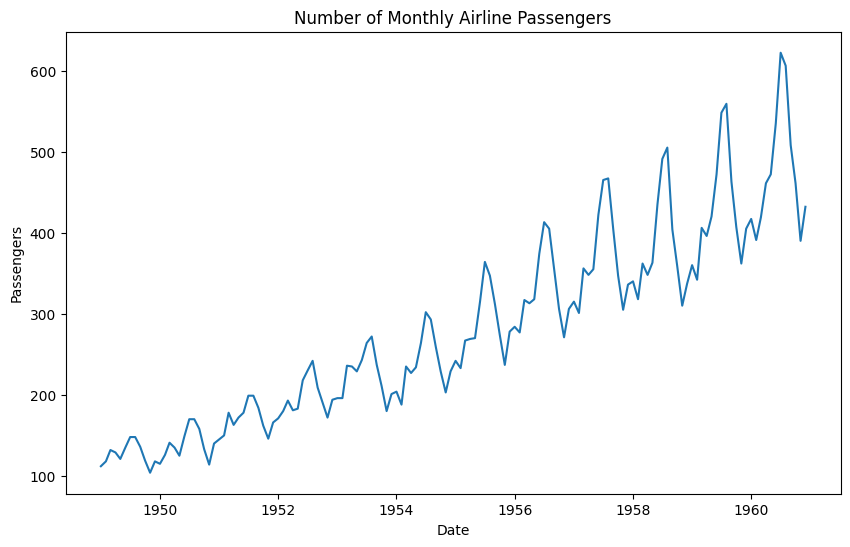

In [9]:
import matplotlib.pyplot as plt

# Plot the number of passengers over time
plt.figure(figsize=(10, 6))
plt.plot(df['passengers'])
plt.title('Number of Monthly Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.show()


In [ ]:
df.values

In [12]:
from statsmodels.tsa.stattools import adfuller
def adf_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
adf_test(df.values)

1. ADF :  0.8153688792060498
2. P-Value :  0.991880243437641
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression: 130
5. Critical Values :
	 1% :  -3.4816817173418295
	 5% :  -2.8840418343195267
	 10% :  -2.578770059171598


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
adf_test = adfuller(df['passengers'])
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')


In [14]:
# Apply first order differencing
df['passengers_diff'] = df['passengers'].diff()

# Drop the NaN values created by differencing
df.dropna(inplace=True)

# Check stationarity again after differencing
adf_test_diff = adfuller(df['passengers_diff'])
print(f'ADF Statistic after differencing: {adf_test_diff[0]}')
print(f'p-value after differencing: {adf_test_diff[1]}')


ADF Statistic after differencing: -2.8292668241700047
p-value after differencing: 0.05421329028382478


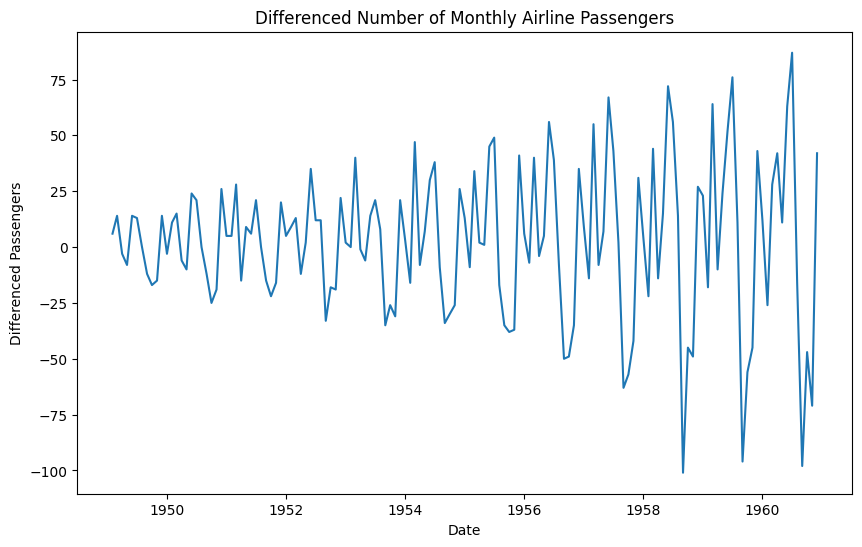

In [15]:
import matplotlib.pyplot as plt

# Plot the differenced data
plt.figure(figsize=(10, 6))
plt.plot(df['passengers_diff'])
plt.title('Differenced Number of Monthly Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Differenced Passengers')
plt.show()


In [16]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model (note the 'd' parameter is set to 1 for first differencing)
model = ARIMA(df['passengers'], order=(1, 1, 1))

# Fit the model
model_fit = model.fit()

# Display the model summary
print(model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             passengers   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -689.968
Date:                Mon, 10 Jun 2024   AIC                           1385.935
Time:                        13:44:27   BIC                           1394.803
Sample:                    02-01-1949   HQIC                          1389.539
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4755      0.124     -3.836      0.000      -0.718      -0.233
ma.L1          0.8646      0.078     11.028      0.000       0.711       1.018
sigma2       968.6921    109.176      8.873      0.0

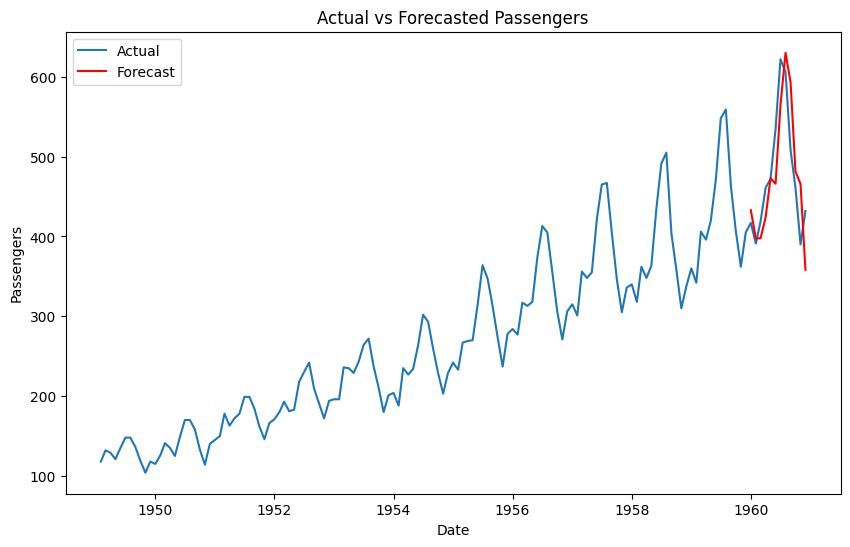

In [17]:
# Make predictions
start_index = '1960-01-01'
end_index = '1960-12-01'
forecast = model_fit.predict(start=start_index, end=end_index, typ='levels')

# Plot the actual and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df['passengers'], label='Actual')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Actual vs Forecasted Passengers')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()
